In [102]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.externals import joblib



In [103]:
df = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv')

In [104]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [105]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [106]:
df.groupby('embarked').size()

embarked
C    270
Q    123
S    914
dtype: int64

In [107]:
df.drop(['name','ticket','cabin','body','home.dest'],axis=1,inplace=True)
df.head()


,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2.00,1,2,151.5500,S,NaN
3,1,0,male,30.00,1,2,151.5500,S,NaN
4,1,0,female,25.00,1,2,151.5500,S,NaN


In [108]:
df['foundboat'] = np.where(df['boat'].isna()==False, 1,0) 
print(df.groupby(['foundboat','boat']).size())
print(df.groupby(['foundboat']).size())

foundboat  boat   
1          1           5
           10         29
           11         25
           12         19
           13         39
           13 15       2
           13 15 B     1
           14         33
           15         37
           15 16       1
           16         23
           2          13
           3          26
           4          31
           5          27
           5 7         2
           5 9         1
           6          20
           7          23
           8          23
           8 10        1
           9          25
           A          11
           B           9
           C          38
           C D         2
           D          20
dtype: int64
foundboat
0    823
1    486
dtype: int64


In [109]:
df.drop(['boat'],axis=1,inplace=True)


In [110]:
df.head()
#sibsp  = # of siblings / spouses aboard the Titanic
#parch = # of parents / children aboard the Titanic

,pclass,survived,sex,age,sibsp,parch,fare,embarked,foundboat
0,1,1,female,29.00,0,0,211.3375,S,1
1,1,1,male,0.92,1,2,151.5500,S,1
2,1,0,female,2.00,1,2,151.5500,S,0
3,1,0,male,30.00,1,2,151.5500,S,0
4,1,0,female,25.00,1,2,151.5500,S,0


In [111]:
df.groupby(['sibsp']).size()

sibsp
0    891
1    319
2     42
3     20
4     22
5      6
8      9
dtype: int64

In [112]:
df.groupby(['parch']).size()

parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
dtype: int64

In [113]:
df['hassomeone'] = np.where((df['sibsp']>0) | (df['parch']>0) , 1,0)

df.groupby(['hassomeone','sibsp','parch']).size()


hassomeone  sibsp  parch
0           0      0        790
1           0      1         52
                   2         43
                   3          2
                   4          2
                   5          2
            1      0        183
                   1         90
                   2         29
                   3          5
                   4          4
                   5          4
                   6          2
                   9          2
            2      0         26
                   1          9
                   2          6
                   3          1
            3      0          3
                   1          9
                   2          8
            4      1         10
                   2         12
            5      2          6
            8      2          9
dtype: int64

In [114]:
df.drop(['sibsp','parch'],axis=1,inplace=True)

df.head()


,pclass,survived,sex,age,fare,embarked,foundboat,hassomeone
0,1,1,female,29.00,211.3375,S,1,0
1,1,1,male,0.92,151.5500,S,1,1
2,1,0,female,2.00,151.5500,S,0,1
3,1,0,male,30.00,151.5500,S,0,1
4,1,0,female,25.00,151.5500,S,0,1


In [115]:
df.isna().sum()/len(df) , df.isna().sum()


(pclass        0.000000
 survived      0.000000
 sex           0.000000
 age           0.200917
 fare          0.000764
 embarked      0.001528
 foundboat     0.000000
 hassomeone    0.000000
 dtype: float64,
 pclass          0
 survived        0
 sex             0
 age           263
 fare            1
 embarked        2
 foundboat       0
 hassomeone      0
 dtype: int64)

In [116]:
df.dropna(subset=['fare'],inplace=True) #looks in specific columns 
df.reset_index(inplace=True) # it is important to reset the index, we will need this later
display(df) 
#notehow index colunmns are offset
df.drop(['index'],axis=1,inplace=True)
display(df) 

,index,pclass,survived,sex,age,fare,embarked,foundboat,hassomeone
0,0,1,1,female,29.00,211.3375,S,1,0
1,1,1,1,male,0.92,151.5500,S,1,1
2,2,1,0,female,2.00,151.5500,S,0,1
3,3,1,0,male,30.00,151.5500,S,0,1
4,4,1,0,female,25.00,151.5500,S,0,1
...,...,...,...,...,...,...,...,...,...
1303,1304,3,0,female,14.50,14.4542,C,0,1
1304,1305,3,0,female,NaN,14.4542,C,0,1
1305,1306,3,0,male,26.50,7.2250,C,0,0
1306,1307,3,0,male,27.00,7.2250,C,0,0


,pclass,survived,sex,age,fare,embarked,foundboat,hassomeone
0,1,1,female,29.00,211.3375,S,1,0
1,1,1,male,0.92,151.5500,S,1,1
2,1,0,female,2.00,151.5500,S,0,1
3,1,0,male,30.00,151.5500,S,0,1
4,1,0,female,25.00,151.5500,S,0,1
...,...,...,...,...,...,...,...,...
1303,3,0,female,14.50,14.4542,C,0,1
1304,3,0,female,NaN,14.4542,C,0,1
1305,3,0,male,26.50,7.2250,C,0,0
1306,3,0,male,27.00,7.2250,C,0,0


In [117]:
df.drop(['age'],axis=1,inplace=True)


In [118]:
df_enc = pd.get_dummies(data = df, columns = ['embarked', 'sex'] ) 

In [119]:
df_enc

,pclass,survived,fare,foundboat,hassomeone,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,1,211.3375,1,0,0,0,1,1,0
1,1,1,151.5500,1,1,0,0,1,0,1
2,1,0,151.5500,0,1,0,0,1,1,0
3,1,0,151.5500,0,1,0,0,1,0,1
4,1,0,151.5500,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1303,3,0,14.4542,0,1,1,0,0,1,0
1304,3,0,14.4542,0,1,1,0,0,1,0
1305,3,0,7.2250,0,0,1,0,0,0,1
1306,3,0,7.2250,0,0,1,0,0,0,1


# random forest

Accuracy: 0.9770992366412213 

foundboat     0.710015
fare          0.087177
sex_female    0.077588
sex_male      0.072314
pclass        0.030878
hassomeone    0.010392
embarked_C    0.005094
embarked_S    0.004692
embarked_Q    0.001851
dtype: float64


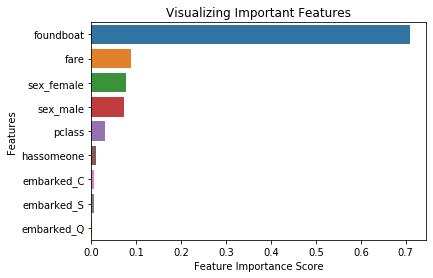

In [120]:

#split dataset in features and target variable
feature_cols = ['pclass', 'fare', 'foundboat', 'hassomeone','embarked_C', 'embarked_Q', 'embarked_S', 'sex_female', 'sex_male'] #removed age
X = df_enc[feature_cols] # Features
y = df_enc['survived'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred),'\n')

feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
print(feature_imp)


sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# remove unwanted vars

Accuracy: 0.9745547073791349 

foundboat     0.754666
fare          0.086437
sex_female    0.076597
sex_male      0.061754
pclass        0.020546
dtype: float64


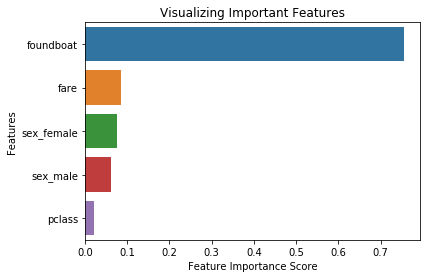

In [121]:

#split dataset in features and target variable
feature_cols = ['pclass', 'fare', 'foundboat', 'sex_female', 'sex_male'] #removed age
X = df_enc[feature_cols] # Features
y = df_enc['survived'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred),'\n')

feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
print(feature_imp)


sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# save the model 

In [122]:
#save existing model - in this case the model directly above 
# Output a pickle file for the model
joblib.dump(clf, 'titanic_model.pkl') 

['titanic_model.pkl']

# load the model

In [123]:
# Load the pickle file
clf_load = joblib.load('titanic_model.pkl')

In [124]:
#here you would need to import your unseen file and format as per your model, I will just do the last step here
feature_cols = ['pclass', 'fare', 'foundboat', 'sex_female', 'sex_male'] #so here I need the same number of cols 
X = df_enc[feature_cols] # Features
y = df_enc['survived'] # Target variable


In [125]:
#you do need an X and y so the model can check it scoring 
assert clf.score(X, y) == clf_load.score(X, y)


In [127]:
#raw array
print(clf_load.predict(X))
print(len(clf_load.predict(X)))

[1 1 0 ... 0 0 0]
1308


In [128]:
scored = pd.DataFrame(clf_load.predict(X),columns=['score'])

print(scored)
print(scored.shape)

      score
0         1
1         1
2         0
3         0
4         0
...     ...
1303      0
1304      0
1305      0
1306      0
1307      0

[1308 rows x 1 columns]
(1308, 1)


In [129]:
#IMPORTANT make sure your records are lining up! 
X['pred_survived'] = scored
X

C:\Users\Thurstan\.conda\envs\pythonlearningx64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pclass,fare,foundboat,sex_female,sex_male,pred_survived
0,1,211.3375,1,1,0,1
1,1,151.5500,1,0,1,1
2,1,151.5500,0,1,0,0
3,1,151.5500,0,0,1,0
4,1,151.5500,0,1,0,0
...,...,...,...,...,...,...
1303,3,14.4542,0,1,0,0
1304,3,14.4542,0,1,0,0
1305,3,7.2250,0,0,1,0
1306,3,7.2250,0,0,1,0


In [130]:
#score the original input file (post processing )

df['pred_survived'] = scored

In [131]:
df

,pclass,survived,sex,fare,embarked,foundboat,hassomeone,pred_survived
0,1,1,female,211.3375,S,1,0,1
1,1,1,male,151.5500,S,1,1,1
2,1,0,female,151.5500,S,0,1,0
3,1,0,male,151.5500,S,0,1,0
4,1,0,female,151.5500,S,0,1,0
...,...,...,...,...,...,...,...,...
1303,3,0,female,14.4542,C,0,1,0
1304,3,0,female,14.4542,C,0,1,0
1305,3,0,male,7.2250,C,0,0,0
1306,3,0,male,7.2250,C,0,0,0


In [132]:
confusion_matrix = pd.crosstab(df['survived'], df['pred_survived'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    0    1
Actual             
0          799    9
1           12  488
